Calabines Ayden Jarrick J.

# Activity 2.1 : Convolutional Neural Network

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network 
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [13]:
from __future__ import print_function

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt


* Shuffle the data
* Split the data into train and test sets

In [14]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [15]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


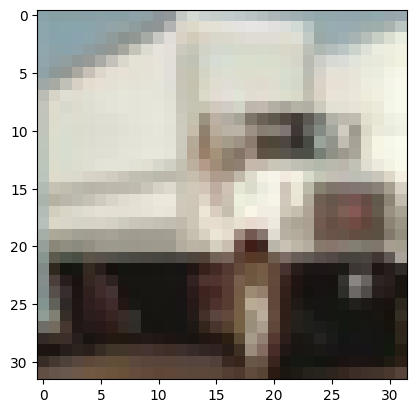

In [16]:
print(y_train[444])
plt.imshow(x_train[444]);

In [17]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [18]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

Convert to float and scale the datasets

In [19]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [20]:

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,162 (707.66 KB)

 Trainable params: 181,162 (707.66 KB)

 Non-trainable params: 0 (0.00 B)

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [22]:
batch_size = 32

opt = tf.keras.optimizers.RMSprop(learning_rate=0.0005)

model_1.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=15,
    validation_data=(x_test, y_test)
)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - accuracy: 0.3672 - loss: 1.7319 - val_accuracy: 0.4633 - val_loss: 1.4902
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4745 - loss: 1.4581 - val_accuracy: 0.5225 - val_loss: 1.3390
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.5215 - loss: 1.3422 - val_accuracy: 0.5772 - val_loss: 1.1947
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5476 - loss: 1.2711 - val_accuracy: 0.5875 - val_loss: 1.1563
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5675 - loss: 1.2202 - val_accuracy: 0.6034 - val_loss: 1.1170
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5813 - loss: 1.1827 - val_accuracy: 0.6089 - val_loss: 1.1020
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5930 - loss: 1.1551 - val_accuracy: 0.6177 - val_loss: 1.0771
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6041 - lo

In [27]:
test_loss, test_accuracy = model_1.evaluate(x_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 1.1375292539596558
Test Accuracy: 0.6148999929428101


In [25]:
history = model_1.fit(x_train, y_train,batch_size=batch_size,epochs=15,validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.6435 - loss: 1.0445 - val_accuracy: 0.6518 - val_loss: 1.0129
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6411 - loss: 1.0504 - val_accuracy: 0.6069 - val_loss: 1.1569
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6426 - loss: 1.0443 - val_accuracy: 0.6446 - val_loss: 1.0254
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6453 - loss: 1.0443 - val_accuracy: 0.5873 - val_loss: 1.2816
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6462 - loss: 1.0451 - val_accuracy: 0.6221 - val_loss: 1.1636
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6463 - loss: 1.0450 - val_accuracy: 0.6616 - val_loss: 0.9945
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6496 - loss: 1.0384 - val_accuracy: 0.6634 - val_loss: 1.0201
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6459 - los

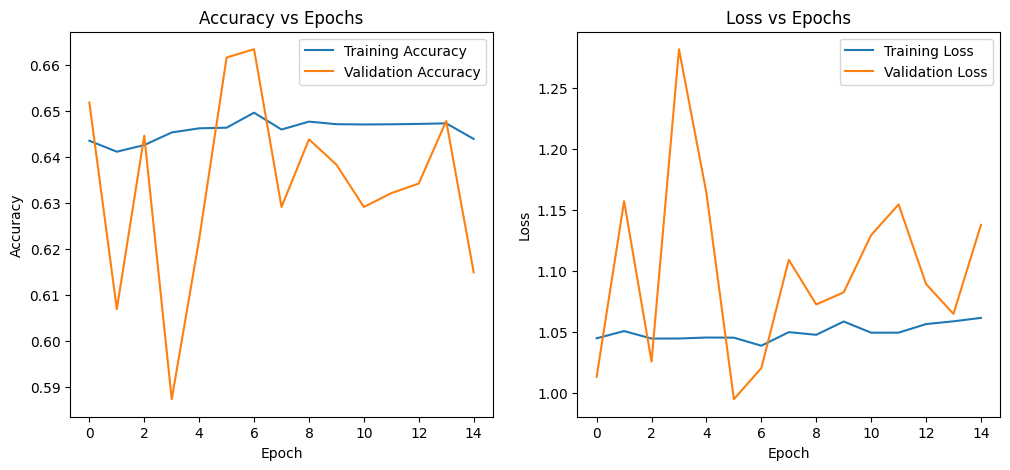

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')

plt.show()

#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

#### Conclusion

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop

model_2 = Sequential()

# Block 1
model_2.add(Conv2D(32, (3, 3), strides=1, padding='same',
                   activation='relu', input_shape=(32, 32, 3)))
model_2.add(Conv2D(32, (3, 3), strides=1, padding='same',
                   activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model_2.add(Conv2D(64, (3, 3), strides=1, padding='same',
                   activation='relu'))
model_2.add(Conv2D(64, (3, 3), strides=1, padding='same',
                   activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# Classifier
model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

In [30]:
opt = RMSprop(learning_rate=0.0005)

model_2.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

In [31]:
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model_1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 362,326 (1.38 MB)

 Trainable params: 181,162 (707.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 181,164 (707.68 KB)

In [34]:
import time

batch_size = 32

start_time = time.time()

history_2 = model_2.fit(x_train, y_train,batch_size=batch_size,epochs=15,validation_data=(x_test, y_test),verbose=1)

end_time = time.time()

training_time = end_time - start_time


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 83ms/step - accuracy: 0.4905 - loss: 1.4124 - val_accuracy: 0.5754 - val_loss: 1.1905
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.6753 - loss: 0.9270 - val_accuracy: 0.7052 - val_loss: 0.8435
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.7504 - loss: 0.7207 - val_accuracy: 0.7298 - val_loss: 0.8137
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.8038 - loss: 0.5677 - val_accuracy: 0.7341 - val_loss: 0.8018
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 76ms/step - accuracy: 0.8508 - loss: 0.4324 - val_accuracy: 0.7530 - val_loss: 0.7950
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.8928 - loss: 0.3132 - val_accuracy: 0.7719 - val_loss: 0.8252
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.9273 - loss: 0.2151 - val_accuracy: 0.7508 - val_loss: 1.1230
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 

In [35]:
print(f"Training time (seconds): {training_time:.2f}")

Training time (seconds): 1888.99


In [36]:
train_loss = history_2.history['loss'][-1]
train_acc = history_2.history['accuracy'][-1]
val_loss = history_2.history['val_loss'][-1]
val_acc = history_2.history['val_accuracy'][-1]

print("Training Loss:", train_loss)
print("Training Accuracy:", train_acc)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)

Training Loss: 0.051933012902736664
Training Accuracy: 0.9835799932479858
Validation Loss: 2.1944048404693604
Validation Accuracy: 0.7631999850273132


In [37]:
model_2.add(Dense(256, activation='relu'))

Text(0.5, 1.0, 'Model 2 Accuracy')

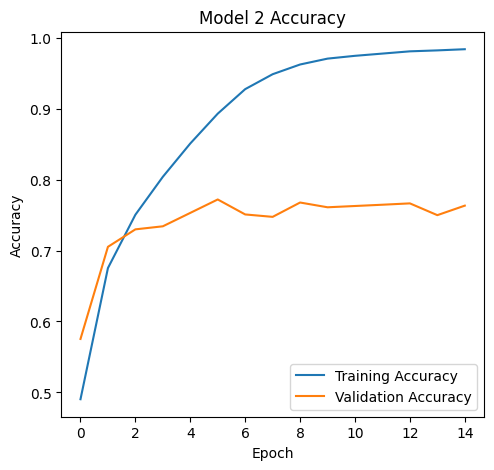

In [38]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model 2 Accuracy')

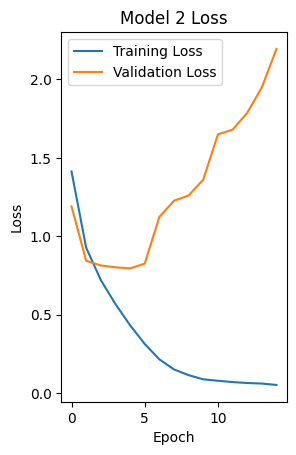

In [39]:
# Loss
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model 2 Loss')

plt.show()

Conclusion

In this supplementary activity, I developed a deeper CNN model to enhance image classification by increasing the number of convolutional layers and parameters. The model achieved a low training loss of 0.0519 and a high training accuracy of 98.36% but the validation results showed a much higher loss of 2.1944 and a lower accuracy of 76.32% which indicated that the model was overfitting. This activity helped me understand that a more complex model does not always guarantee better results, especially when generalization is not properly addressed.